# 타이타닉 EDA

> 가정
- 남자, 여자 중 여자가 많이 살을 것이다.
- 객실등급 1등급인 사람들이 많이 살았을 것이다.
- 실제 어린이들이 많이 살았을 것이다.

> 미션
- 남자/여자 수, 객실 등급별 수
- 연령대별 수(10대, 20대, 30대, 40대,...)
- 남여별/객실등급별 생존바수를 그래프로 표현

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import *
%matplotlib inline

# 미션 1
- 남자/여자별 승객수 분석 결과
- 객실 등급별 승객수 분석 결과

In [2]:
df = pd.read_csv('./data/titanic_train.csv')



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
len(df)

891

In [6]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
# dict로 세기
def count_columns(result_dic, element) :
    if result_dic.get(element) :
        result_dic[element] += 1
    else:
        result_dic[element] = 1

    return result_dic

def get_group_count(df_column) :
    return reduce(count_columns, df_column, dict())

In [8]:
result = get_group_count(df['Sex'])
result

{'male': 577, 'female': 314}

In [9]:
result = get_group_count(df['Pclass'])
result

{3: 491, 1: 216, 2: 184}

In [10]:
len(df['Sex'][df.Sex=='female'])

314

In [11]:
len(df['Pclass'][df.Pclass ==1])

216

# 분석2
- 남자/여자 &  객실 등급별 승객수 분석 결과

In [12]:
len(df)

891

In [13]:
# sex와 pclass를 튜플로 붂어서 리스트에 저장
idx = 0
df_columns = []

for idx in range(len(df)):
    element = df['Sex'][idx], df['Pclass'][idx]
    df_columns.append(element)
    
len(df_columns)

891

In [14]:
df_columns[0:5]

[('male', 3), ('female', 1), ('female', 3), ('female', 1), ('male', 3)]

In [15]:
def get_group_count(df_columns) :
    
    # 전체 열 개수
    print('len(df_columns) :', len(df_columns))
    
    # 
    def count_columns(result_dic, element_tuple) :
        element1, element2 = element_tuple
        # print(element1, ':', element2)

        if not (result_dic.get(element1)) :
            result_dic[element1] = {}
              
        if result_dic[element1].get(element2) :
            result_dic[element1][element2] += 1
        else :
            result_dic[element1][element2] = 1

        return result_dic
    
    result = reduce(count_columns, df_columns, dict()) # reduce(로직, 리스트, 초기값)
    return result

In [16]:
result = get_group_count(df_columns)
result

len(df_columns) : 891


{'male': {3: 347, 1: 122, 2: 108}, 'female': {1: 94, 3: 144, 2: 76}}

In [17]:
dict_element = result['female']
dict_element

{1: 94, 3: 144, 2: 76}

In [18]:
dict_values = [dict_element[key]for key in dict_element.keys()]
dict_values

[94, 144, 76]

In [19]:
sum(dict_values)

314

In [20]:

count_f = []
count_m = []

for i in range(3):
    idx = i+1
    count_f.append(result['female'][idx])
    count_m.append(result['male'][idx])

In [21]:
count_f, count_m

([94, 76, 144], [122, 108, 347])

# 미션 3
- 데이터 분석결과 시각화

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

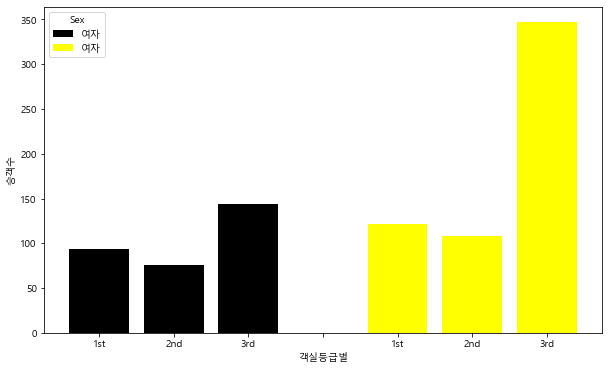

In [23]:
t1 = [1,2,3]  # 두 그래프 사이의 간격을 두기 위해 4는 사용x
t2 = [5,6,7]

plt.bar(t1, count_f, color= 'black', label = '여자')
plt.bar(t2, count_m, color= 'yellow', label = '여자')
plt.xlabel('객실등급별')
plt.ylabel('승객수')
plt.legend(title = 'Sex')

t = list(range(1, 8))
plt.xticks(t, ('1st','2nd','3rd','','1st','2nd','3rd'))
plt.show()

In [24]:
count_p1 = count_f[0], count_m[0]
count_p2 = count_f[1], count_m[1]
count_p3 = count_f[2], count_m[2]

count_p1, count_p2, count_p3

((94, 122), (76, 108), (144, 347))

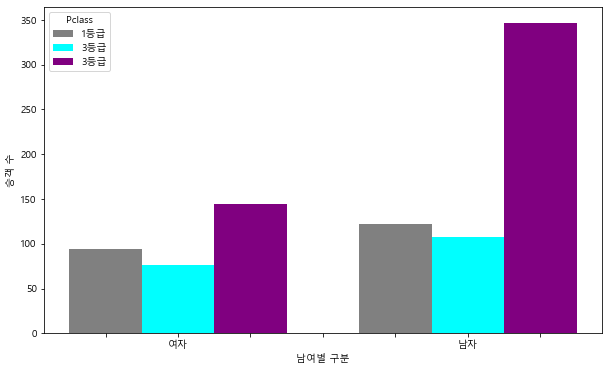

In [25]:
t1 = [1, 5]
t2 = [2, 6]
t3 = [3, 7]

plt.figure(figsize = (10,6))
plt.bar(t1, count_p1, color = 'gray', width = 1, label = '1등급')
plt.bar(t2, count_p2, color = 'cyan', width = 1, label = '3등급')
plt.bar(t3, count_p3, color = 'purple', width = 1, label = '3등급')

plt.xlabel('남여별 구분')
plt.ylabel('승객 수')
plt.legend(title = 'Pclass')

t = list(range(1, 8))

plt.xticks(t, ('', '여자','','','','남자',''))
plt.show()

# Pandas 사용하기

In [26]:
from pandas import Series, DataFrame

In [27]:
df_tmp = DataFrame({
    'Sex' : df.Sex,
    'Pclass' : df.Pclass
})


df_tmp.head(10)

,Sex,Pclass
0,male,3
1,female,1
2,female,3
3,female,1
4,male,3
5,male,3
6,male,1
7,male,3
8,female,3
9,female,2


In [28]:
df_tmp_f = df_tmp[df_tmp.Sex =='female']
df_tmp_f.head()

,Sex,Pclass
1,female,1
2,female,3
3,female,1
8,female,3
9,female,2


In [29]:
df_tmp_f1 = df_tmp_f[df_tmp_f.Pclass==1]
df_tmp_f1.head()

,Sex,Pclass
1,female,1
3,female,1
11,female,1
31,female,1
52,female,1


In [30]:
len(df_tmp_f1)

94

In [31]:
df_tmp_f1[::10]

,Sex,Pclass
1,female,1
177,female,1
269,female,1
311,female,1
369,female,1
498,female,1
571,female,1
700,female,1
781,female,1
862,female,1


In [32]:
len(df_tmp)

891

In [33]:
df_tmp['Category'] = ''
df_tmp.head()

,Sex,Pclass,Category
0,male,3,
1,female,1,
2,female,3,
3,female,1,
4,male,3,


In [34]:
df_tmp.index

RangeIndex(start=0, stop=891, step=1)

In [35]:
for idx in  df_tmp.index:
    pclass = df_tmp['Pclass'][idx]
    sex    = df_tmp['Sex'][idx]
    category = '{}:{}'.format(pclass, sex)
    
    # 100개 단위로 프린트하기 위해
    if (idx%100==0) or (idx==len(df_tmp)-1):  print(idx, '\t=>', category)
        
    # df_tmp['Category'][idx] = category
    df_tmp.Category[idx] = category

0 	=> 3:male


C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


100 	=> 3:female
200 	=> 3:male
300 	=> 3:female
400 	=> 3:male
500 	=> 3:male
600 	=> 2:female
700 	=> 1:female
800 	=> 2:male
890 	=> 3:male


In [36]:
df_tmp.head()

,Sex,Pclass,Category
0,male,3,3:male
1,female,1,1:female
2,female,3,3:female
3,female,1,1:female
4,male,3,3:male


In [37]:
df_tmp['Category'].unique()

array(['3:male', '1:female', '3:female', '1:male', '2:female', '2:male'],
      dtype=object)

In [38]:
len(df_tmp[df_tmp['Category']=='1:female'])

94

In [39]:
count_f = []
count_f.append(len(df_tmp[df_tmp['Category']=='1:female']))
count_f.append(len(df_tmp[df_tmp['Category']=='2:female']))
count_f.append(len(df_tmp[df_tmp['Category']=='3:female']))

count_f

[94, 76, 144]

In [40]:
count_m = []
count_m.append(len(df_tmp[df_tmp['Category']=='1:male']))
count_m.append(len(df_tmp[df_tmp['Category']=='2:male']))
count_m.append(len(df_tmp[df_tmp['Category']=='3:male']))

count_m

[122, 108, 347]

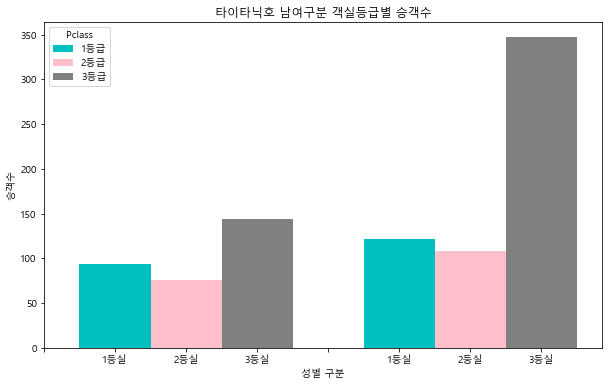

In [41]:
t1 = [1,5]
t2 = [2,6]
t3 = [3,7]

plt.figure(figsize =(10, 6))
plt.bar(t1, count_p1, color = 'c', width = 1, label = '1등급')
plt.bar(t2, count_p2, color = 'pink', width = 1, label = '2등급')
plt.bar(t3, count_p3, color = 'gray', width = 1, label = '3등급')
plt.title('타이타닉호 남여구분 객실등급별 승객수')
plt.xlabel('성별 구분')
plt.ylabel('승객수')
plt.legend(title = 'Pclass')

t = list(range(8))

plt.xticks(t, ('','1등실','2등실','3등실','','1등실','2등실','3등실'))
plt.show()

In [1]:
plt.figure(figsize=(10,6))

colors = ['w' , 'b', 'g', 'r', 'w', 'c', 'm', 'y', 'w', 'k' ]
labels = ['', '여자,1등실', '여자,2등실', '여자,3등실', '', '남자,1등실', '남자,2등실', '남자,2등실']
# xticks = ('', '여자','','','','남자','' )
xticks = ('1등실', '2등실\n\n여자','3등실','','1등실','2등실\n\n남자','3등실' )
t = list(range(1,8))

for idx in range(1, 8):
    plt.bar(idx, count_all[idx], color=colors[idx], width=0.8, label=labels[idx])

plt.title('타이타닉호 남여-객실등급별 승객수')
plt.ylabel('승객수')
plt.legend(title='남여-객실등급별\n')

plt.xticks(t , xticks)   # set the locations of the xticks
plt.show()


NameError: name 'plt' is not defined